In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
model = LogisticRegression(random_state=42)
encoder = LabelEncoder()

In [28]:
#filling the categorical data.
def filling_categorical_data(test):
    test['Stage_fear'] = test['Stage_fear'].fillna(test['Stage_fear'].mode()[0])
    test['Drained_after_socializing'] = test['Drained_after_socializing'].fillna(test['Drained_after_socializing'].mode()[0])



In [29]:
#filling the numeric_data
def filling_numeric_data(test):
    for cols in test:
        if cols == 'Personality':
            break
        if cols != 'Stage_fear' and cols != 'Drained_after_socializing':
            if test[cols].skew() > 0.5 or test[cols].skew() < -0.5:
                test[cols] = test[cols].fillna(test[cols].median())
            else :
                test[cols] = test[cols].fillna(test[cols].mean())



In [ ]:
def encoding_string_inData(test):
    test['Stage_fear'] = test['Stage_fear'].map({'Yes': 1, 'No' : 0})
    test['Drained_after_socializing'] = test['Drained_after_socializing'].map({'Yes' : 1, 'No': 0})

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

test = pd.read_csv('./data/train.csv')
ids = test['id']
test.drop('id', axis=1,inplace=True)

filling_categorical_data(test)

filling_numeric_data(test)

encoding_string_inData(test)
y = test['Personality']
x = test.drop('Personality', axis=1)

y_encoded = encoder.fit_transform(y)

x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.94      0.95      0.95       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

The train data accuracy of Model is 0.9680140360348202. test accuracy of Model 0.9713900134952766


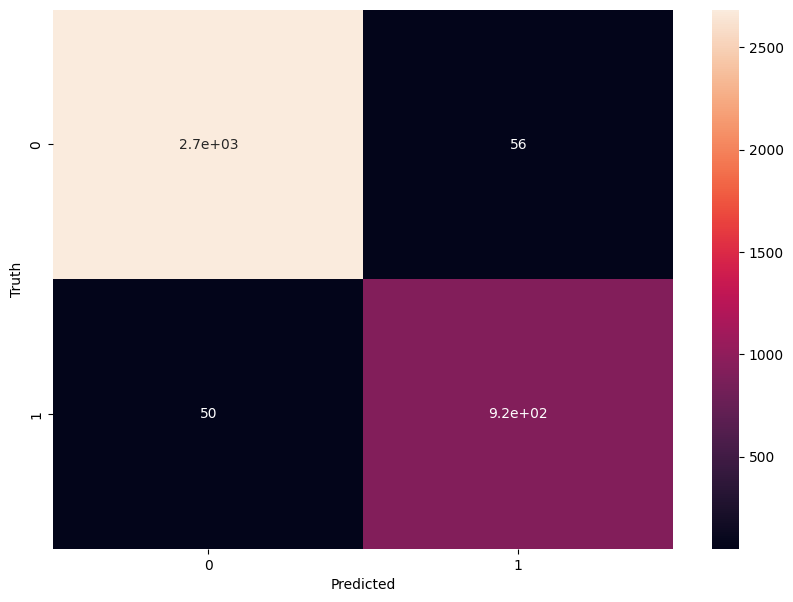

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

y_train_pred = model.predict(x_train)

val_accuracy = accuracy_score(y_test, y_pred)

train_accuracy = accuracy_score(y_train, y_train_pred)


print(f"The train data accuracy of Model is {train_accuracy}. test accuracy of Model {val_accuracy}")

## Creating the Submission.csv

In [33]:
test1 = pd.read_csv('./data/test.csv')
test_ids = test1['id']
test1.drop('id', axis=1,inplace=True)
filling_categorical_data(test1)

filling_numeric_data(test1)

encoding_string_inData(test1)
test1_scaled = scaler.transform(test1)

test_predictions_encoded = model.predict(test1_scaled)
test_predictions = encoder.inverse_transform(test_predictions_encoded)

submission = pd.DataFrame({
    'id' : test_ids,
    'Personality' : test_predictions
})
submission.to_csv('Prediction_using_Logistic_Regression.csv', index=False)
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
